## EDA For Literacy Rate Affecting The Status Of The Countries


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns;

### Import and clean the dataset for literacy rate for each country for time period = 2018

In [35]:
edu = pd.read_excel("Literacy-rate_2021-1.xlsx", sheet_name = 2, nrows = 203, header = 0)
edu = edu.drop(columns = ['Gender','Source'])
edu = edu.drop([0])
edu = edu.drop(columns=edu.columns[6])
edu = edu.rename(columns={"Unnamed: 9": "Time period"})
edu = edu.rename(columns={"Region": "Region_UNICEF"})
edu = edu.rename(columns={"Total": "Total_LiteracyRate"})
edu = edu.reset_index(drop=True)
# Cleaning the data by dropping the countries marked as "Not Classified" in Development Regions
edu = edu[edu['Development Regions'] != 'Not Classified']
edu = edu.dropna()
edu = edu.rename(columns={"Countries and areas": "Country/Territory"})
edu.head()

,ISO3,Country/Territory,Region_UNICEF,Sub-region,Development Regions,Total_LiteracyRate,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,65.420547,2018
1,ALB,Albania,ECA,EECA,More Developed,99.330002,2018
2,DZA,Algeria,MENA,MENA,Less Developed,97.426521,2018
7,ARG,Argentina,LAC,LAC,Less Developed,99.505524,2018
13,BHR,Bahrain,MENA,MENA,Less Developed,99.687202,2018


In [36]:
edu['Development Regions'].value_counts()

Less Developed     46
Least Developed    20
More Developed     12
Name: Development Regions, dtype: int64

### Import All Data FIW To Compare The Status of the Countries with The Literacy Rate for 2018 Edition

In [37]:
allData = pd.read_excel("All_data_FIW_2013-2022.xlsx", sheet_name = 1, header=1)
allData = allData[allData['Edition'] == 2018]
allData = allData.reset_index(drop = True)
allData = allData.drop(columns=allData.columns[7:-1])
allData.head()


,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,Total
0,Abkhazia,Eurasia,t,2018,PF,4,5,41
1,Afghanistan,Asia,c,2018,NF,5,6,26
2,Albania,Europe,c,2018,PF,3,3,68
3,Algeria,Africa,c,2018,NF,6,5,35
4,Andorra,Europe,c,2018,F,1,1,96


Number of Countries Free, Partially Free and Not Free for 2018 Edition

In [38]:
allData['Status'].value_counts()

F     89
PF    63
NF    57
Name: Status, dtype: int64

### EDA for Literacy Rate Dataset

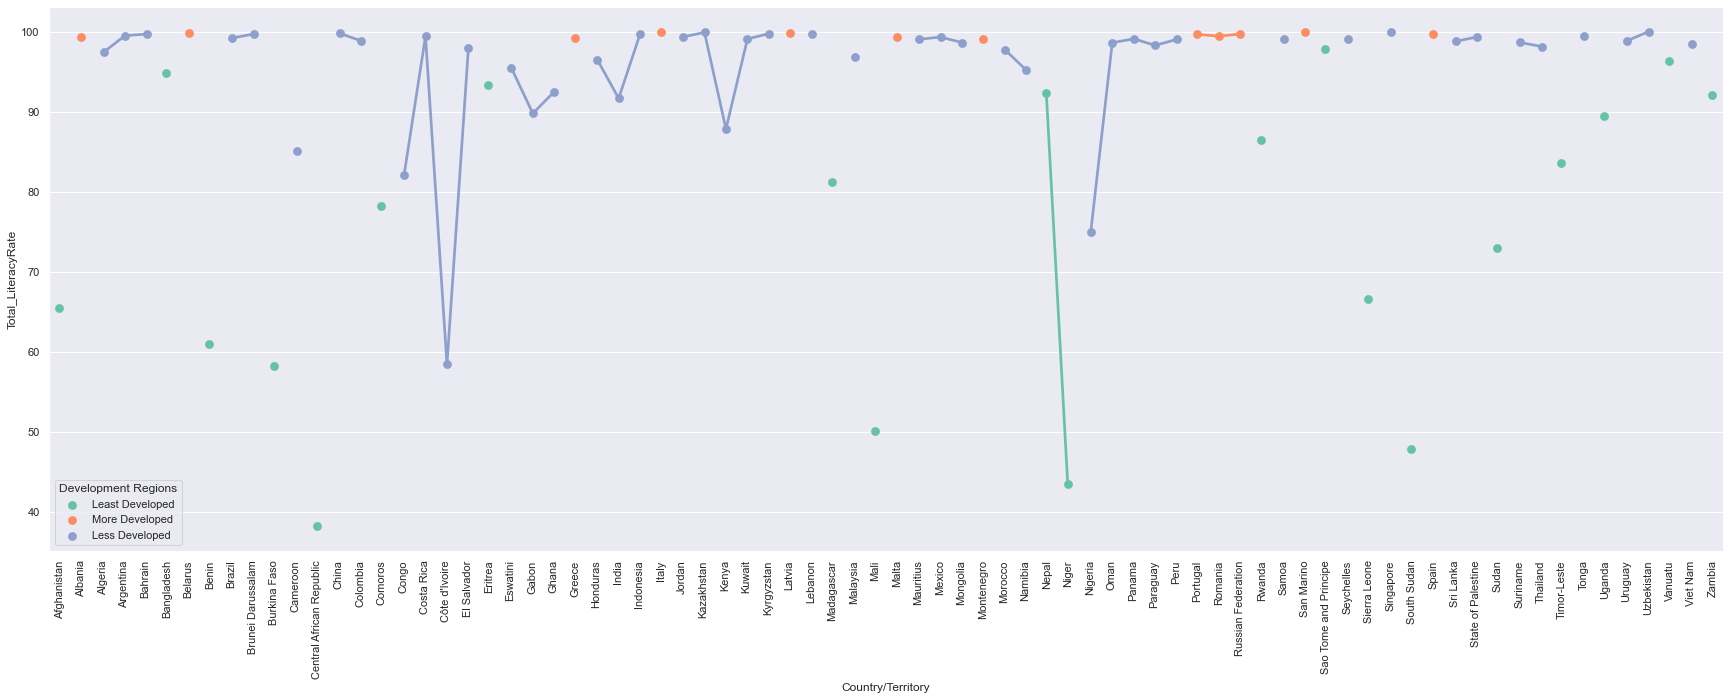

In [39]:
# # edu_grps = edu.groupby(['Development Regions']).
# fig, ax = plt.subplots()
# edu_grp = edu_grp.dropna()
# edu_grp = edu.groupby(['Development Regions','Countries and areas','Total']).count()
# edu_grp = edu_grp.reset_index()
# edu_grp
# fig, axs = plt.subplots()
# sns.kdeplot(edu[edu['Development Regions']=='Less Developed']['Total'], label="less developed", alpha=0.5, ax = axs[0])
# ax.hist(edu[edu['Development Regions']=='Least Developed']['Total'], label="least developed", alpha=0.5)
# ax.hist(edu[edu['Development Regions']=='More Developed']['Total'], label="more developed", alpha=0.5)
# ax.legend()
# edu_grps = edu.groupby(['Development Regions']).

# ax.hist(edu[edu['Development Regions']=='Less Developed']['Countries and areas'], alpha=0.5)
# ax.hist(edu[edu['Total']< 70]['Countries and areas'], alpha=0.5)
# ax.hist(edu[edu['Total']>70]['Countries and areas'], alpha=0.5)

# sns.histplot(data=edu,x = 'Total', hue='Development Regions', fill=True,stat='density',element='step',common_norm=False)
# sns.stripplot(data=edu, x='Development Regions', y='Total', hue='Region')

# # sns.barplot(data=edu, x='Development Regions', y='Total')

axs = sns.pointplot(data=edu, x='Country/Territory', y='Total_LiteracyRate', hue='Development Regions', dodge=True, palette='Set2')
axs = axs.set_xticklabels(labels = edu['Country/Territory'], rotation=90)
axs = sns.set(rc={'figure.figsize':(30,10)})
# sns.boxenplot(data=edu, x='Region', y='Total', hue='Development Regions')




### EDA comparing status and literacy rate


In [40]:
allData_merged = allData.merge(edu, how='left', on='Country/Territory')
allData_merged = allData_merged.dropna()
allData_merged.head()


,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,Total,ISO3,Region_UNICEF,Sub-region,Development Regions,Total_LiteracyRate,Time period
1,Afghanistan,Asia,c,2018,NF,5,6,26,AFG,SA,SA,Least Developed,65.420547,2018
2,Albania,Europe,c,2018,PF,3,3,68,ALB,ECA,EECA,More Developed,99.330002,2018
3,Algeria,Africa,c,2018,NF,6,5,35,DZA,MENA,MENA,Less Developed,97.426521,2018
7,Argentina,Americas,c,2018,F,2,2,83,ARG,LAC,LAC,Less Developed,99.505524,2018
13,Bahrain,Middle East,c,2018,NF,7,6,12,BHR,MENA,MENA,Less Developed,99.687202,2018


<AxesSubplot:xlabel='Region', ylabel='Total_LiteracyRate'>

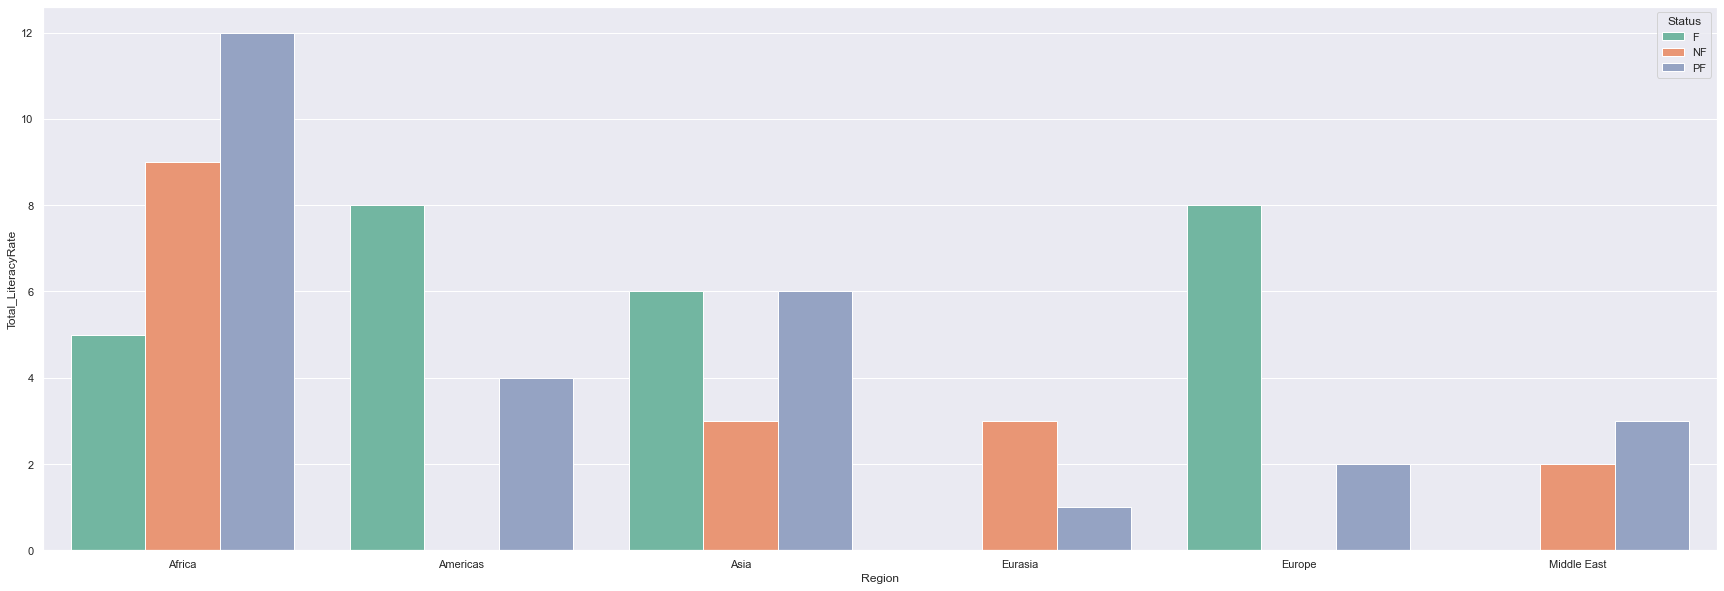

In [99]:
# fig, ax = plt.subplots()
allData_grp = allData_merged.groupby(['Region','Status']).count()
allData_grp = allData_grp.reset_index()
# allData_grp



# sns.catplot(data=allData_merged, x='Country/Territory', y='Total_LiteracyRate', hue='Status', col='Region', kind="bar")


sns.barplot(data=allData_grp, x='Region', y='Total_LiteracyRate', hue='Status', palette='Set2')


#  g = sns.catplot(x="sex", y="total_bill",
# ...                 hue="smoker", col="time",
# ...                 data=tips, kind="bar",
# ...                 height=4, aspect=.7);

<AxesSubplot:xlabel='Development Regions', ylabel='val'>

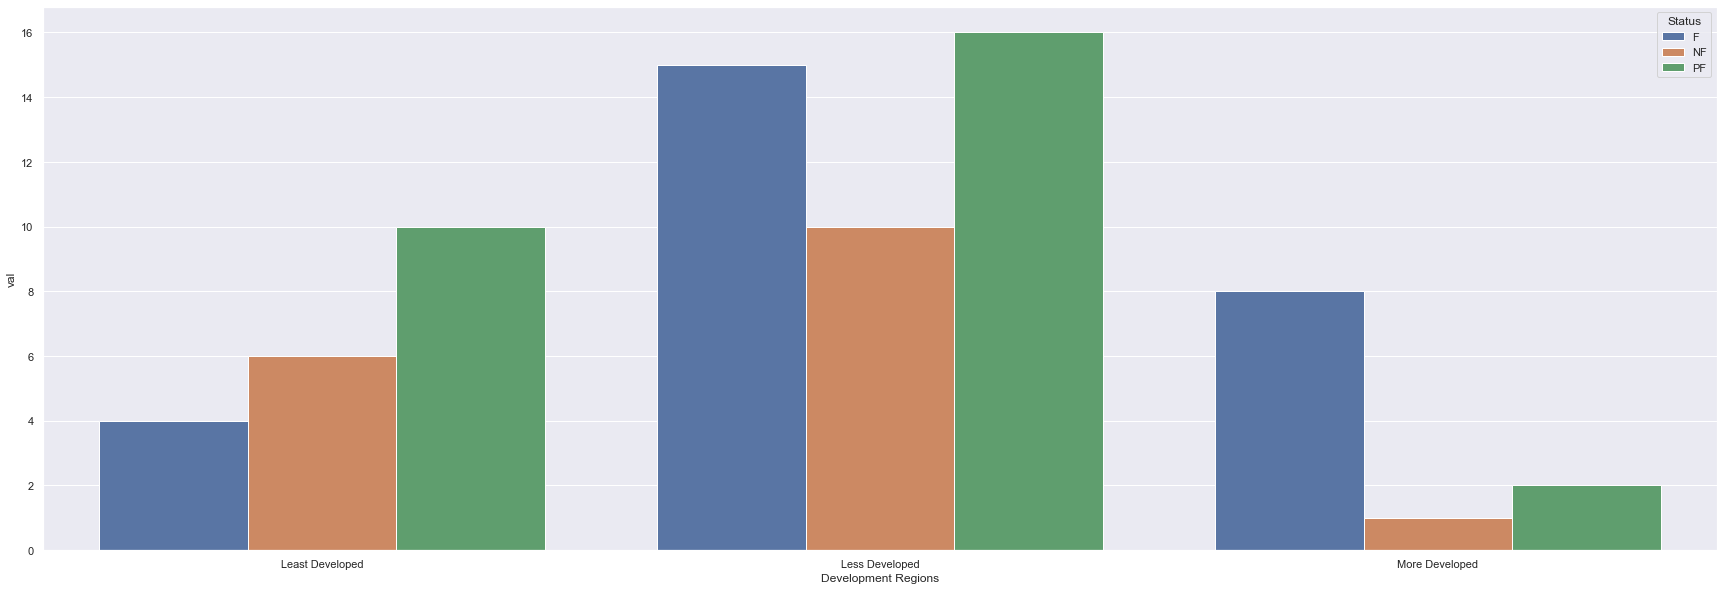

In [103]:
# development_regions with status
allData_grp2 = allData_merged.groupby(['Development Regions','Status']).agg(val = ('Country/Territory','count'))
allData_grp2 = allData_grp2.reset_index()
# allData_grp2
sns.barplot(data=allData_grp2, x='Development Regions', y='val', hue='Status')



More Developed Country, we see that the total number of free countries is more than the other status.
To the contray, analysing the Less and Least Developed Countries, the number of countries not free is more than in Less Developed than in Least Developed.
